In [3]:
import pandas as pd
import numpy as np
import ast  # For safely evaluating string representations of lists

In [4]:
frequency_data = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/mous_words_syllable_bigram_frequencies.csv')
guslatho_subtlex = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/guslatho_MOUS_word_syllable_frequencies.csv', index_col=0)
frequency_data = frequency_data[['Word','Bigrams','Bigram Occurrence Counts','Zipf']]

In [5]:
frequency_data

,Word,Bigrams,Bigram Occurrence Counts,Zipf
0,toen,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333
1,de,['de'],[2559661.0],7.381291
2,barkeeper,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674
3,die,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871
4,irritante,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921
...,...,...,...,...
1937,blije,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836
1938,jongeren,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097
1939,intens,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748
1940,plezier,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966


In [6]:
subtlex_syllabified = pd.read_csv("/home/neel/Desktop/MOUS_hierarchical-representations/guslatho/syllabificator/subtlex_syllabified.csv", index_col=0)

subtlex_syllabified = subtlex_syllabified[['Word','Syllabification','FREQcount','Zipf']]
#Pick 10 rows at random
examples = subtlex_syllabified.sample(n=10, random_state=42)
examples.to_csv('/home/neel/Desktop/MOUS_hierarchical-representations/guslatho/syllabificator/subtlex_syllabified_examples.csv')


In [7]:
guslatho_subtlex

,Word,n_syllables,Log10_Syllable_FREQcounts,Syllable_Zipfs,Min_Log10_FreqCount,Max_Log10_FreqCount,Mean_Log10_FreqCount,Min_Syll_Zipf
0,ik,1,"(6.241737438532683,)","(7.468668823067624,)",6.241737,6.241737,6.241737,7.468669
1,je,1,"(6.249430979053402,)","(7.476362363588343,)",6.249431,6.249431,6.249431,7.476362
2,het,1,"(6.032457179694622,)","(7.259388564229563,)",6.032457,6.032457,6.032457,7.259389
3,de,1,"(6.234172950952972,)","(7.461104335487914,)",6.234173,6.234173,6.234173,7.461104
4,dat,1,"(6.012697215956926,)","(7.239628600491868,)",6.012697,6.012697,6.012697,7.239629
...,...,...,...,...,...,...,...,...
278056,aagghh,1,"(0.3010299956639812,)","(1.5279613801989225,)",0.301030,0.301030,0.301030,1.527961
278057,aagezien,3,"(1.5185139398778875, 6.125745990776331, 5.0128...","(2.7454453244128287, 7.352677375311273, 6.2397...",1.518514,6.125746,4.219027,2.745445
278058,aaf,1,"(0.3010299956639812,)","(1.5279613801989225,)",0.301030,0.301030,0.301030,1.527961
278059,aada's,0,(),(),NaN,NaN,NaN,NaN


In [8]:
#show values of frequency_data where Bigram Occurrence Counts is an empty list
empty_bigram_occurrence_counts = frequency_data[frequency_data['Bigram Occurrence Counts'].apply(lambda x: ast.literal_eval(x) == [])]
empty_bigram_occurrence_counts

,Word,Bigrams,Bigram Occurrence Counts,Zipf
1012,u,[],[],6.736845


In [9]:
#drop row 1012 from frequency_data
frequency_data = frequency_data.drop(index=1012)

In [10]:
data_table = pd.merge(guslatho_subtlex,frequency_data,how='right', on='Word')


In [11]:
# Ensure all elements in 'Log10_Syllable_FREQcounts' are lists
def ensure_list(x):
    if isinstance(x, float):  # If it's a float, wrap it in a list
        return [x]
    elif isinstance(x, str):  # If it's a string, safely evaluate it
        return ast.literal_eval(x)
    return x  # Otherwise, return as is

data_table['Log10_Syllable_FREQcounts'] = data_table['Log10_Syllable_FREQcounts'].apply(ensure_list)

# Print rows where 'Log10_Syllable_FREQcounts' is empty
empty_rows = data_table[data_table['Log10_Syllable_FREQcounts'].apply(lambda x: len(x) == 0)]
missing_nsyllables = data_table[data_table['n_syllables'].isna()]
#why are native Dutch words not getting syllabified? look into this. If they are in MOUS but not in subtlex, get a full count of them. 
#Why is 'fotocamera's' and 'darien's' not showing up in empty_rows?
#Should only compute the matrix on words that are non-empty for all vals.

# Compute max and mean values, handling empty lists
data_table['Max_Log10_Syllable_FREQcount'] = data_table['Log10_Syllable_FREQcounts'].apply(lambda x: max(x) if x else np.nan)
data_table['Mean_Log10_Syllable_FREQcount'] = data_table['Log10_Syllable_FREQcounts'].apply(lambda x: np.mean(x) if x else np.nan)

In [ ]:
missing_nsyllables


,Word,n_syllables,Log10_Syllable_FREQcounts,Syllable_Zipfs,Min_Log10_FreqCount,Max_Log10_FreqCount,Mean_Log10_FreqCount,Min_Syll_Zipf,Bigrams,Bigram Occurrence Counts,Zipf
90,sportarts,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['sp', 'po', 'or', 'rt', 'ta', 'ar', 'rt', 'ts']","[1518373.0, 490468.0, 2597583.0, 1154116.0, 89...",NaN
247,matste,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['ma', 'at', 'ts', 'st', 'te']","[957657.0, 996808.0, 235160.0, 2307098.0, 3522...",NaN
370,heilsoldaat,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['he', 'ei', 'il', 'ls', 'so', 'ol', 'ld', 'da...","[822995.0, 2483878.0, 2591190.0, 114609.0, 369...",NaN
388,judoka,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['ju', 'ud', 'do', 'ok', 'ka']","[40398.0, 671255.0, 394555.0, 155024.0, 424843.0]",NaN
406,naaktlopers,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['na', 'aa', 'ak', 'kt', 'tl', 'lo', 'op', 'pe...","[523332.0, 2730922.0, 762048.0, 179298.0, 3145...",NaN
423,fransien,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['fr', 'ra', 'an', 'ns', 'si', 'ie', 'en']","[384202.0, 2220035.0, 4143386.0, 612425.0, 109...",NaN
432,bijknipt,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['bi', 'ij', 'jk', 'kn', 'ni', 'ip', 'pt']","[743491.0, 1639122.0, 518095.0, 81592.0, 63829...",NaN
711,veluwe,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['ve', 'el', 'lu', 'uw', 'we']","[1767776.0, 4671207.0, 273011.0, 98896.0, 1965...",NaN
800,technoloog,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['te', 'ec', 'ch', 'hn', 'no', 'ol', 'lo', 'oo...","[3522714.0, 411920.0, 1999086.0, 65507.0, 8475...",NaN
821,utrechtse,NaN,[nan],NaN,NaN,NaN,NaN,NaN,"['ut', 'tr', 're', 'ec', 'ch', 'ht', 'ts', 'se']","[137082.0, 1199332.0, 1607974.0, 411920.0, 199...",NaN


In [13]:
import sys
sys.path.append('/home/neel/Desktop/MOUS_hierarchical-representations/guslatho/syllabificator')
from main import syllabificate_word
for word in missing_nsyllables['Word']:
    syllabified = syllabificate_word(word)
    if syllabified is not None:
        print(f"Syllabified {word} to {syllabified}")
    else:
        print(f"Failed to syllabify {word}")

Syllabified sportarts to sport-arts
Syllabified matste to mat-ste
Syllabified heilsoldaat to heil-sol-daat
Syllabified judoka to ju-do-ka
Syllabified naaktlopers to naakt-lo-pers
Syllabified fransien to fran-sien
Syllabified bijknipt to bij-knipt
Syllabified veluwe to ve-lu-we
Syllabified technoloog to tech-no-loog
Syllabified utrechtse to ut-recht-se
Syllabified behangrol to be-hang-rol
Syllabified beetgare to beet-ga-re
Syllabified waterland to wa-ter-land
Syllabified trimmers to trim-mers
Syllabified keukenhof to keu-ken-hof
Syllabified fotocamera's to fo-to-ca-me-ra's
Syllabified kopieerwerk to ko-pi-eer-werk
Syllabified ongekleurd to on-ge-kleurd
Syllabified dorien's to do-ri-en-'s
Syllabified knuistjes to knuist-jes
Syllabified pvda to pv-da
Syllabified ijslollies to ijs-lol-lies
Syllabified vocalisten to vo-ca-lis-ten
Syllabified dodewaard to do-de-waard
Syllabified lampionnen to lam-pi-on-nen
Syllabified volleybalteam to vol-ley-bal-team
Syllabified toneelbouwers to to-neel-bou

In [14]:
len(missing_nsyllables)

29

In [9]:
#drop empty_rows from data_table
data_table = data_table.drop(empty_rows.index)

In [10]:
def to_float_list(x):
    if isinstance(x, str):  # Check if the value is a string
        x = ast.literal_eval(x)  # Safely evaluate the string to a Python object
    return [float(i) for i in x]


In [11]:
data_table['Min_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: min(to_float_list(x)))
data_table['Max_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: max(to_float_list(x)))
data_table['Mean_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: np.mean(to_float_list(x)))

data_table['Log10_Min_BG_Freq'] = data_table['Min_BG_Freq_Count'].apply(lambda x: np.log10(x + 1))
data_table['Log10_Max_BG_Freq'] = data_table['Max_BG_Freq_Count'].apply(lambda x: np.log10(x +1))
data_table['Log10_Mean_BG_Freq'] = data_table['Mean_BG_Freq_Count'].apply(lambda x: np.log10(x +1))

In [12]:
data_table['Number of Letters'] = data_table['Word'].apply(lambda x: len(x.split('_')[0]) if isinstance(x, str) else 0)


In [13]:
data_table = data_table.drop(columns = ['Min_Syll_Zipf','Syllable_Zipfs','Min_BG_Freq_Count','Max_BG_Freq_Count','Mean_BG_Freq_Count','Bigram Occurrence Counts','Bigrams','Log10_Syllable_FREQcounts'])
data_table = data_table.rename(columns={'Min_Log10_FreqCount':'Min_Log10_Syllable_FREQcount'})                 
data_table

,Word,n_syllables,Min_Log10_Syllable_FREQcount,Zipf,Max_Log10_Syllable_FREQcount,Mean_Log10_Syllable_FREQcount,Log10_Min_BG_Freq,Log10_Max_BG_Freq,Log10_Mean_BG_Freq,Number of Letters
0,toen,1.0,4.680453,6.032333,4.680453,4.680453,5.923138,6.931582,6.587966,4
1,de,1.0,6.234173,7.381291,6.234173,6.234173,6.408183,6.408183,6.408183,2
2,barkeeper,3.0,3.177825,3.622674,4.710760,3.954366,5.276522,6.832469,6.318381,9
3,die,1.0,5.527755,6.853871,5.527755,5.527755,6.021295,6.317368,6.194088,3
4,irritante,4.0,3.046105,3.284921,5.910039,4.458198,5.302532,6.617355,6.279933,9
...,...,...,...,...,...,...,...,...,...,...
1936,blije,2.0,4.573869,3.485836,5.300413,4.937141,5.182289,6.527521,6.181431,5
1937,jongeren,3.0,4.668600,3.965097,6.125746,5.425722,5.937706,6.931582,6.584448,8
1938,intens,2.0,2.922725,3.778748,5.704651,4.313688,5.787054,6.931582,6.516387,6
1939,plezier,2.0,3.788522,5.093966,3.953808,3.871165,4.987541,6.832469,6.355247,7


In [14]:
data_table.columns

Index(['Word', 'n_syllables', 'Min_Log10_Syllable_FREQcount', 'Zipf',
       'Max_Log10_Syllable_FREQcount', 'Mean_Log10_Syllable_FREQcount',
       'Log10_Min_BG_Freq', 'Log10_Max_BG_Freq', 'Log10_Mean_BG_Freq',
       'Number of Letters'],
      dtype='object')

In [15]:
#Parameters for making the correlation matrix
#frequency_data['Zipf'] : rename to Zipf Word Frequency
#frequency_data['Log10_Min_Syll_Freq'] : rename to Log10(Minimum Syllable Frequency)
#frequency_data['Log10_Min_BG_Freq'] : rename to Log10(Minimum Bigram Frequency)
#frequency_data['Number of Letters']
#frequency_data['Syllable Count'] : rename to Number of Syllables
#frequency_data['Log10_Max_Syll_Freq'] : rename to Log10(Maximum Syllable Frequency)
#frequency_data['Log10_Mean_Syll_Freq'] : rename to Log10(Mean Syllable Frequency)
#frequency_data['Log10_Max_BG_Freq'] : rename to Log10(Maximum Bigram Frequency)
#frequency_data['Log10_Mean_BG_Freq'] : rename to Log10(Mean Bigram Frequency)




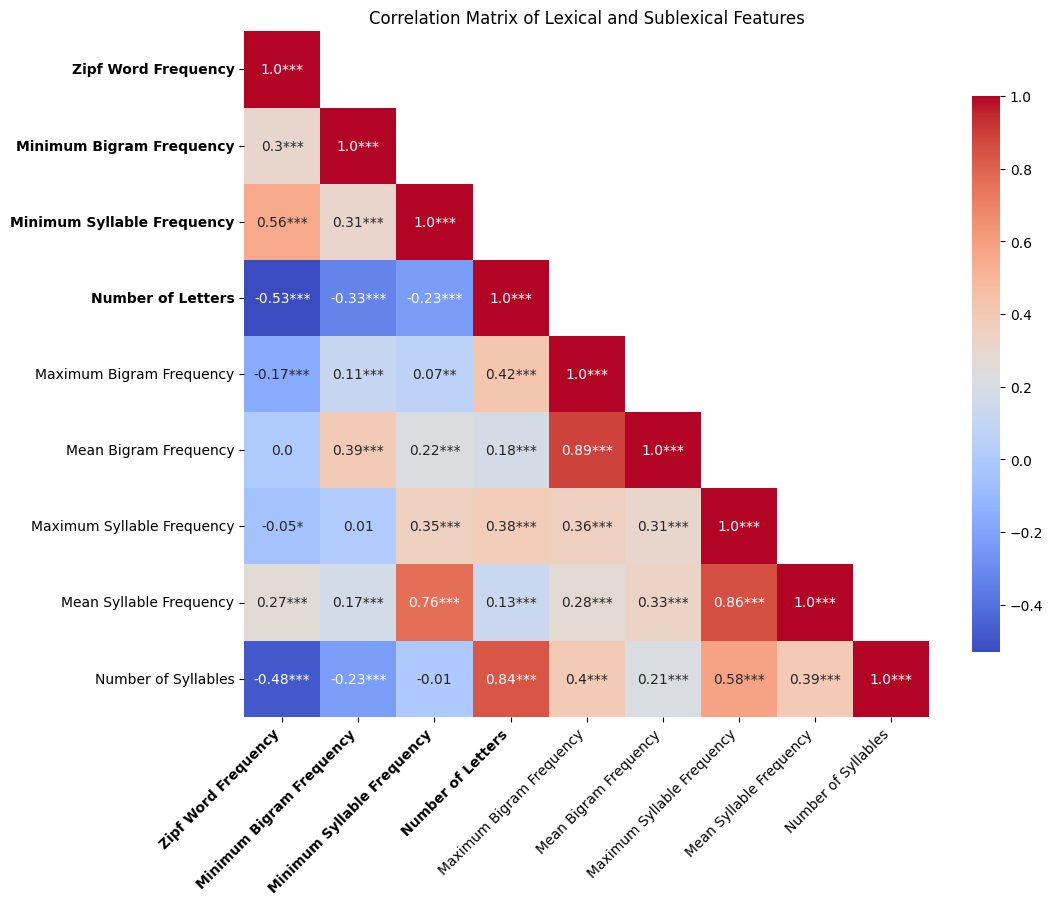

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# --- Rename to include 'FREQcount' ---
bigram_rename = {
    'Log10_Max_BG_Freq': 'Maximum Bigram Frequency',
    'Log10_Mean_BG_Freq': 'Mean Bigram Frequency',
    'Log10_Min_BG_Freq': 'Minimum Bigram Frequency',
    'Zipf': 'Zipf Word Frequency',
    'Min_Log10_Syllable_FREQcount': 'Minimum Syllable Frequency',
    'Max_Log10_Syllable_FREQcount': 'Maximum Syllable Frequency',
    'Mean_Log10_Syllable_FREQcount': 'Mean Syllable Frequency',
    'n_syllables': 'Number of Syllables',
    'Number of Letters': 'Number of Letters'
}

# Rename columns in data_table
data_table = data_table.rename(columns={k: v for k, v in bigram_rename.items() if k in data_table.columns})

# Ensure all columns listed in bigram_rename_ordered exist in data_table
bigram_rename_ordered = [
    'Zipf Word Frequency',
    'Minimum Bigram Frequency',
    'Minimum Syllable Frequency',
    'Number of Letters',
    'Maximum Bigram Frequency',
    'Mean Bigram Frequency',
    'Maximum Syllable Frequency',
    'Mean Syllable Frequency',
    'Number of Syllables'
]

for col in bigram_rename_ordered:
    if col not in data_table.columns:
        print(f"Column '{col}' is missing. Creating it as NaN.")
        data_table[col] = np.nan  # Create missing columns with NaN values

# Coerce columns to numeric
for col in bigram_rename_ordered:
    data_table[col] = pd.to_numeric(data_table[col], errors='coerce')

# Subset data
subset = data_table[bigram_rename_ordered].dropna()

# Compute correlation matrix and p-values
corr_matrix = subset.corr()
p_values = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

for row in corr_matrix.index:
    for col in corr_matrix.columns:
        if row != col:
            r, p = pearsonr(subset[row], subset[col])
            p_values.loc[row, col] = p

# Mask upper triangle
mask = np.triu(np.ones(corr_matrix.shape), k=1)

# Annotate with asterisks for significance
def significance_annotate(val):
    if val < 0.001:
        return '***'
    elif val < 0.01:
        return '**'
    elif val < 0.05:
        return '*'
    else:
        return ''

annot = corr_matrix.round(2).astype(str) + p_values.applymap(significance_annotate)

# Plot
plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, mask=mask, annot=annot, fmt='', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()

#bold the first four columns and the first four rows
for label in plt.gca().get_xticklabels()[:4]:
    label.set_fontweight('bold')
for label in plt.gca().get_yticklabels()[:4]:
    label.set_fontweight('bold')

plt.show()

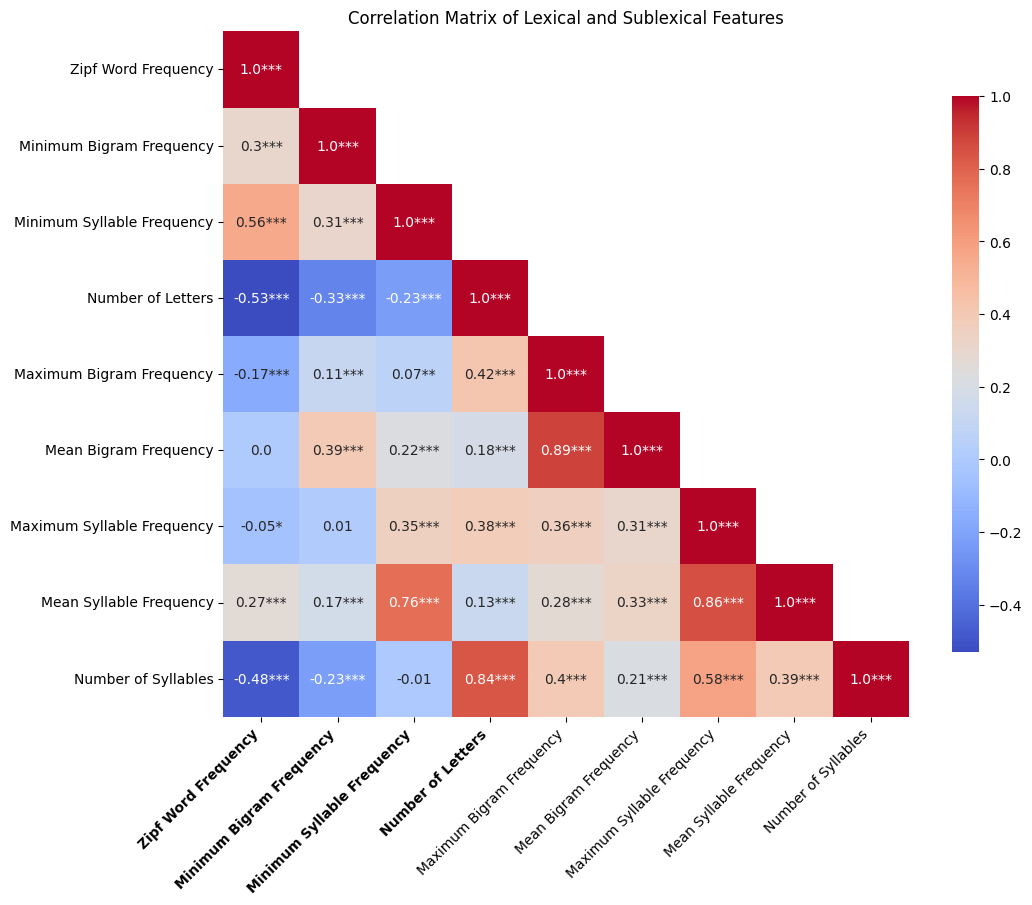

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# # --- Rename to include 'FREQcount' ---
# bigram_rename = {
#     'Log10_Max_BG_Freq': 'Log10(Maximum Bigram FREQcount)',
#     'Log10_Mean_BG_Freq': 'Log10(Mean Bigram FREQcount)',
#     'Log10_Min_BG_Freq': 'Log10(Minimum Bigram FREQcount)',
#     'Zipf': 'Zipf Word Frequency',
#     'Min_Log10_Syllable_FREQcount': 'Log10(Minimum Syllable FREQcount)',
#     'Max_Log10_Syllable_FREQcount': 'Log10(Maximum Syllable FREQcount)',
#     'Mean_Log10_Syllable_FREQcount': 'Log10(Mean Syllable FREQcount)',
#     'n_syllables': 'Number of Syllables',
#     'Number of Letters': 'Number of Letters'
# }

# # Rename columns in data_table
# data_table = data_table.rename(columns={k: v for k, v in bigram_rename.items() if k in data_table.columns})

# # Ensure all columns listed in bigram_rename_ordered exist in data_table
# bigram_rename_ordered = [
#     'Zipf Word Frequency',
#     'Log10(Minimum Syllable FREQcount)',
#     'Log10(Maximum Syllable FREQcount)',
#     'Log10(Mean Syllable FREQcount)',
#     'Log10(Minimum Bigram FREQcount)',
#     'Log10(Maximum Bigram FREQcount)',
#     'Log10(Mean Bigram FREQcount)',
#     'Number of Syllables',
#     'Number of Letters'
# ]

for col in bigram_rename_ordered:
    if col not in data_table.columns:
        print(f"Column '{col}' is missing. Creating it as NaN.")
        data_table[col] = np.nan  # Create missing columns with NaN values

# Coerce columns to numeric
for col in bigram_rename_ordered:
    data_table[col] = pd.to_numeric(data_table[col], errors='coerce')

# Subset data and drop rows with NaN values
subset = data_table[bigram_rename_ordered].dropna()

# Compute correlation matrix and p-values
corr_matrix = subset.corr()
p_values = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

for row in corr_matrix.index:
    for col in corr_matrix.columns:
        if row != col:
            r, p = pearsonr(subset[row], subset[col])  # No need to drop NaN again
            p_values.loc[row, col] = p

# Mask upper triangle
mask = np.triu(np.ones(corr_matrix.shape), k=1)

# Annotate with asterisks for significance
def significance_annotate(val):
    if val < 0.001:
        return '***'
    elif val < 0.01:
        return '**'
    elif val < 0.05:
        return '*'
    else:
        return ''

annot = corr_matrix.round(2).astype(str) + p_values.applymap(significance_annotate)

# Plot
plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, mask=mask, annot=annot, fmt='', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()

#bold the first four columns
for label in plt.gca().get_xticklabels()[:4]:
    label.set_fontweight('bold')
plt.show()

"The matrix displays pairwise Pearson correlation coefficients among nine word-level parameters, including lexical frequency, sublexical frequency measures (bigram and syllable), and structural characteristics (letter and syllable counts). The color scale is centered at zero, such that red and blue indicate positive and negative correlations, respectively. Asterisks denote statistical significance of each correlation coefficient (p < .001: ***). Bolded axis labels indicate the five features that were ultimately selected as parametric modulators in the fMRI general linear models. Not shown above is spoken word duration in seconds, which was included as a parametric modulator in the auditory word frequency correlation contrast, but is not a constant lexical characteristic. While log-transformed maximum and mean frequencies for syllables and bigrams were initially considered (see Supplementary Methods), they were excluded due to lack of explanatory power."

In [21]:
data_table.to_csv('correlation_matrix_data.csv')